# Titanic

First of all lets discover the data.

## Data Preparation

I have __three files__. The two of them represent the data splitted by **train** and **test**. And the third file **gender_submission.csv** is example of submission.

I found one more file from open source with the data about passagers from Titanic - **titanic3.csv**.

Let's look at the data.

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import graphviz 

# Alternative source of data
data_types_main = {
    'Survived': np.int8, 
    'Pclass': np.int8,
    'Name': str,
    'Sex': str,
    'Age': np.float16,
    'Sibsp': np.int8,
    'Parch': np.int8,
    'Ticket': str,
    'Fare': np.float16,
    'Cabin': str,
    'Embarked': str
}

data_types = {
    'survived': np.int8, 
    'pclass': np.int8,
    'name': str,
    'sex': str,
    'age': np.float16,
    'sibsp': np.int8,
    'parch': np.int8,
    'ticket': str,
    'fare': np.float16,
    'cabin': str,
    'embarked': str,
    'boat': str,
    'body': np.float16,
    'home.dest': str
}

submission_columns = ['PassengerId', 'Survived']

# Import data 
df = pd.read_csv('train.csv', dtype=data_types_main)
submission_df = pd.read_csv('test.csv', dtype=data_types_main)

# Alternative dataset
alt_df = pd.read_csv('titanic3.csv', dtype=data_types)

In [2]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.250000,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.312500,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.925781,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.093750,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.046875,NaN,S


To better undestanding the nature of the data I decided to join the **train** and **test** sets. 

In [3]:
submission_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.828125,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.000000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.687500,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.664062,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.289062,NaN,S


In [4]:
alt_df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.000000,0,0,24160,211.375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.916504,1,2,113781,151.500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.000000,1,2,113781,151.500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.000000,1,2,113781,151.500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.000000,1,2,113781,151.500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


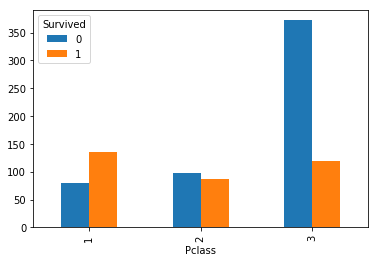

In [5]:
df.pivot_table('PassengerId', 'Pclass', 'Survived', 'count').plot(kind='bar')

As we can see at this plot **Pclass** plays a very important role. Passengers from the first class are more lucky than others.

Let's look how many children are survived.

In [6]:
df['AgeStatus'] = df.apply(
    lambda row: 'child' if (row['Age'] <= 18) else 'adult' if (row['Age'] > 18) else 'unknown', 
    axis=1
)

unknown_age_df = df[df['Age'].isnull()]

print('People with unknown age are {} from {}.'.format(unknown_age_df.PassengerId.count(), df.PassengerId.count()))

People with unknown age are 177 from 891.


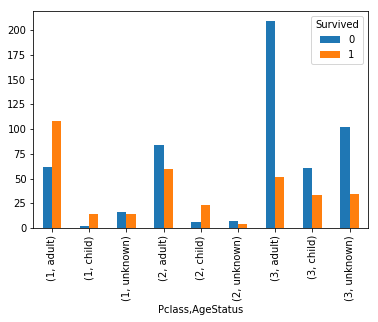

In [7]:
df.pivot_table('PassengerId', ['Pclass', 'AgeStatus'], 'Survived', 'count').plot(kind='bar')

I want to fix NaNs in **Age**. 

If passenger does not have **Parch** he is propably adult. If passager has **Mrs** in the **Name**, she is probably an adult.

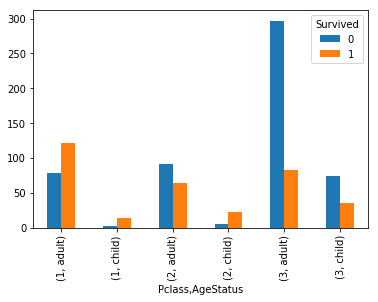

In [8]:
def AgeStatusGenerator(x):
    if (x['Age'] > 18):
        return 'adult'
    elif (x['Age'] <= 18):
        return 'child'
    elif (x['Parch'] == 0):
        return 'adult'
    elif (str(x['Name']).find('Mrs.') is not -1):
        return 'adult'
    elif (str(x['Name']).find('Miss') is not -1):
        return 'child'
    elif (str(x['Name']).find('Master') is not -1):
        return 'child'
    else:
        # This is four passegers who have Parch=2 and several siblings
        # PassengerIds: 201, 324, 783, 846
        return 'child'

df['AgeStatus'] = df.apply(AgeStatusGenerator, axis=1)
submission_df['AgeStatus'] = submission_df.apply(AgeStatusGenerator, axis=1)

# Now let's look at the bar once more
df.pivot_table('PassengerId', ['Pclass', 'AgeStatus'], 'Survived', 'count').plot(kind='bar')

With age statuses done. Now I am going to fix the data in **Embarked**. 

Two passagers have missed value of this field: passagers **61** and **829**. I am going to fill these values with the most popular values in this column.

In [9]:
emb_stats = df.groupby('Embarked').count()['PassengerId']
most_popular_embarked = emb_stats[emb_stats == emb_stats.max()].index[0]

df.loc[df['Embarked'].isnull(), 'Embarked'] = most_popular_embarked
submission_df.loc[submission_df['Embarked'].isnull(), 'Embarked'] = most_popular_embarked

In [10]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeStatus
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.250000,NaN,S,adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.312500,C85,C,adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.925781,NaN,S,adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.093750,C123,S,adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.046875,NaN,S,adult


In [11]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.687500,0.523008,0.381594,32.187500
std,257.353842,0.486592,0.836071,14.523438,1.102743,0.806057,inf
min,1.000000,0.000000,1.000000,0.419922,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910156
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.453125
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.500000


## Correlation Matrix

So, to consider the string values in columns **Name**, **Sex**, **AgeStatus** and **Embarked** in calculations I add **NameLen** and transform string labels in other columns to integers.

In [12]:
from sklearn.preprocessing import LabelEncoder

dicts = {}

label = LabelEncoder()

# Sex
label.fit(df.Sex.drop_duplicates())
dicts['Sex'] = list(label.classes_)
df['Sex'] = label.transform(df.Sex) 
submission_df['Sex'] = label.transform(submission_df.Sex) 

# AgeStatus
label.fit(df.AgeStatus.drop_duplicates())
dicts['AgeStatus'] = list(label.classes_)
df['AgeStatus'] = label.transform(df.AgeStatus) 
submission_df['AgeStatus'] = label.transform(submission_df.AgeStatus) 

# Embarked
label.fit(df.Embarked.drop_duplicates())
dicts['Embarked'] = list(label.classes_)
df['Embarked'] = label.transform(df.Embarked) 
submission_df['Embarked'] = label.transform(submission_df.Embarked) 

# NameLen
df['NameLen'] = df['Name'].str.len()
submission_df['NameLen'] = submission_df['Name'].str.len()

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeStatus,NameLen
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.250000,NaN,2,0,23
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.312500,C85,0,0,51
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.925781,NaN,2,0,22
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.093750,C123,2,0,44
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.046875,NaN,2,0,24


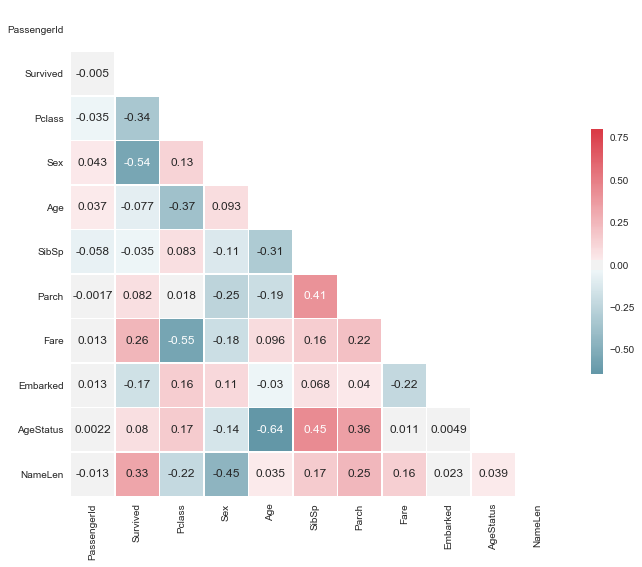

In [13]:
sns.set(style="white")

corr = df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.8, center=0, annot=True, 
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [14]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeStatus,NameLen
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.000000,NaN,2,0,21
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.000000,B42,2,0,28
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,NaN,1,2,W./C. 6607,23.453125,NaN,2,1,40
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.000000,C148,0,0,21
890,891,0,3,"Dooley, Mr. Patrick",1,32.0,0,0,370376,7.750000,NaN,1,0,19


The column **Sex** effects the survival the most. The column **NameLen** takes less effect and the next columns **Pclass** correlates with the **Survived** more than all other columns. 

Thus I decide to use only these features in model fitting.

## Model Fitting

Let's prepare the data to model fitting.

I am not going to use values of the columns Fare, SibSp, Parch, Age, Ticket, Cabin.

In [15]:
#from sklearn.model_selection import train_test_split

df = df.drop(['Fare', 'SibSp', 'Parch', 'Age', 'Ticket','Cabin'],axis=1)

#train_df, test_df = train_test_split(df, test_size=0.4, random_state=0)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Embarked,AgeStatus,NameLen
0,1,0,3,"Braund, Mr. Owen Harris",1,2,0,23
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,0,0,51
2,3,1,3,"Heikkinen, Miss. Laina",0,2,0,22
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,2,0,44
4,5,0,3,"Allen, Mr. William Henry",1,2,0,24


In [16]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import cross_val_score

bin_columns = [
    'AgeStatus0', 'AgeStatus1',
    'Sex0', 'Sex1',
    'Pclass0', 'Pclass1', 'Pclass2',
    'Embarked0', 'Embarked1', 'Embarked2',
]

features = {
    'SP': ['Sex0', 'Sex1', 'Pclass0', 'Pclass1', 'Pclass2'],
    'SPN': ['Sex0', 'Sex1', 'Pclass0', 'Pclass1', 'Pclass2', 'NameLen'],
    'NS': ['NameLen', 'Sex0', 'Sex1'],
    'SPE': ['Sex0', 'Sex1', 'Pclass0', 'Pclass1', 'Pclass2', 'Embarked0', 'Embarked1', 'Embarked2'],
    'SPEA': ['Sex0', 'Sex1', 'Pclass0', 'Pclass1', 'Pclass2', 'Embarked0', 'Embarked1', 'Embarked2', 
             'AgeStatus0', 'AgeStatus1'],
}
    
target = 'Survived'

Y = df[target]

onehot_encoder = OneHotEncoder(sparse=False)

df_bin = pd.DataFrame(onehot_encoder.fit_transform(df[['AgeStatus', 'Sex', 'Pclass', 'Embarked']]), 
                      columns=bin_columns)

submission_df_bin = pd.DataFrame(onehot_encoder.fit_transform(submission_df[['AgeStatus', 'Sex', 'Pclass', 'Embarked']]), 
                      columns=bin_columns)

data = df.join(df_bin)
submission_data = submission_df.join(submission_df_bin)

data.head()

,PassengerId,Survived,Pclass,Name,Sex,Embarked,AgeStatus,NameLen,AgeStatus0,AgeStatus1,Sex0,Sex1,Pclass0,Pclass1,Pclass2,Embarked0,Embarked1,Embarked2
0,1,0,3,"Braund, Mr. Owen Harris",1,2,0,23,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,0,0,51,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,3,1,3,"Heikkinen, Miss. Laina",0,2,0,22,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,2,0,44,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,5,0,3,"Allen, Mr. William Henry",1,2,0,24,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0


### Decision trees

In [17]:
from sklearn import tree

modelName = 'Decision Tree'

for key, feature_set in features.items():
    X = data[feature_set]

    clf = tree.DecisionTreeClassifier()
        
    scores = cross_val_score(clf, X, Y, cv=5)   
    print("%s [%s]: \tAccuracy: %0.2f (+/- %0.2f)" % (modelName, key, scores.mean(), scores.std() * 2))

Decision Tree [SP]: 	Accuracy: 0.77 (+/- 0.04)
Decision Tree [SPN]: 	Accuracy: 0.78 (+/- 0.04)
Decision Tree [NS]: 	Accuracy: 0.76 (+/- 0.03)
Decision Tree [SPE]: 	Accuracy: 0.81 (+/- 0.03)
Decision Tree [SPEA]: 	Accuracy: 0.81 (+/- 0.03)


### Random Forest 

In [18]:
from sklearn.ensemble import RandomForestClassifier

modelName = 'Random Forest'

for key, feature_set in features.items():
    X = data[feature_set]

    clf = RandomForestClassifier(n_estimators=80, max_depth=10, random_state=0)
        
    scores = cross_val_score(clf, X, Y, cv=5)   
    print("%s [%s]: \tAccuracy: %0.2f (+/- %0.2f)" % (modelName, key, scores.mean(), scores.std() * 2))


Random Forest [SP]: 	Accuracy: 0.77 (+/- 0.04)
Random Forest [SPN]: 	Accuracy: 0.79 (+/- 0.04)
Random Forest [NS]: 	Accuracy: 0.76 (+/- 0.02)
Random Forest [SPE]: 	Accuracy: 0.81 (+/- 0.03)
Random Forest [SPEA]: 	Accuracy: 0.81 (+/- 0.03)


### SVM 

In [21]:
from sklearn.svm import SVC

for key, feature_set in features.items():
    X = data[feature_set]

    clf = SVC()
        
    scores = cross_val_score(clf, X, Y, cv=5)   
    print("%s [%s]: \tAccuracy: %0.2f (+/- %0.2f)" % (modelName, key, scores.mean(), scores.std() * 2))

Random Forest [SP]: 	Accuracy: 0.78 (+/- 0.04)
Random Forest [SPN]: 	Accuracy: 0.79 (+/- 0.02)
Random Forest [NS]: 	Accuracy: 0.78 (+/- 0.05)
Random Forest [SPE]: 	Accuracy: 0.80 (+/- 0.03)
Random Forest [SPEA]: 	Accuracy: 0.80 (+/- 0.03)


## Prediction

Let's prepare test set for prediction for the best feature set and model.

In [20]:
from sklearn.ensemble import RandomForestClassifier

key = 'SPEA'

X = data[features[key]]

clf = RandomForestClassifier(n_estimators=80, max_depth=10, random_state=0)

clf.fit(X, Y)

submission_data['Survived'] = clf.predict(submission_data[features[key]])

submission_data[submission_columns].to_csv('submission.csv', index=False)